In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train
x_test = x_test
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [3]:
import random

rand_selected = random.sample([x for x in range(0, len(x_train))], 30000)
x_train = x_train[rand_selected]
y_train = y_train[rand_selected]

print(f"shape of x_train is {tf.shape(x_train)}")
print(f"shape of y_train is {tf.shape(y_train)}")
print(f"shape of x_test is {tf.shape(x_test)}")
print(f"shape of y_test is {tf.shape(y_test)}")

shape of x_train is [30000    32    32     3]
shape of y_train is [30000    10]
shape of x_test is [10000    32    32     3]
shape of y_test is [10000    10]


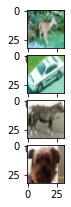

In [4]:
fig = plt.figure()

for i in range(1, 5):
    ax = fig.add_subplot(5, 1, i)
    ax.imshow(x_train[i])

In [5]:
mean = np.mean(x_train, axis=(0, 1, 2, 3))
std = np.std(x_train, axis=(0, 1, 2, 3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

In [6]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)
datagen.fit(x_train)

In [7]:
weight_decay = 0.0005
model = keras.models.Sequential([
    keras.layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), input_shape=x_train.shape[1:]),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.4),

    keras.layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.4),

    keras.layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),

    keras.layers.Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.4),

    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(weight_decay)),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

opt = keras.optimizers.Adam()
loss = keras.losses.CategoricalCrossentropy()
model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0

In [8]:
model.fit(datagen.flow(x_train, y_train), epochs=40, verbose=2, batch_size=64, validation_data=(x_test, y_test), workers=4)

Epoch 1/40
938/938 - 39s - loss: 2.4121 - accuracy: 0.2938 - val_loss: 1.9914 - val_accuracy: 0.3903
Epoch 2/40
938/938 - 38s - loss: 1.6742 - accuracy: 0.4714 - val_loss: 1.5063 - val_accuracy: 0.5260
Epoch 3/40
938/938 - 33s - loss: 1.4796 - accuracy: 0.5439 - val_loss: 1.4448 - val_accuracy: 0.5721
Epoch 4/40
938/938 - 32s - loss: 1.3955 - accuracy: 0.5862 - val_loss: 1.5007 - val_accuracy: 0.5701
Epoch 5/40
938/938 - 32s - loss: 1.3610 - accuracy: 0.6190 - val_loss: 1.8723 - val_accuracy: 0.5083
Epoch 6/40
938/938 - 32s - loss: 1.3252 - accuracy: 0.6375 - val_loss: 1.5927 - val_accuracy: 0.5828
Epoch 7/40
938/938 - 32s - loss: 1.2873 - accuracy: 0.6588 - val_loss: 1.2137 - val_accuracy: 0.6919
Epoch 8/40
938/938 - 32s - loss: 1.2535 - accuracy: 0.6737 - val_loss: 1.3527 - val_accuracy: 0.6572
Epoch 9/40
938/938 - 32s - loss: 1.2224 - accuracy: 0.6880 - val_loss: 1.2558 - val_accuracy: 0.6967
Epoch 10/40
938/938 - 32s - loss: 1.2030 - accuracy: 0.7000 - val_loss: 1.3785 - val_accura

In [9]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9820 - accuracy: 0.7931


[0.9820287227630615, 0.7930999994277954]